# Railway Incidents Data - Clustering

## This script contains the following points:
1. Importing Libraries
2. Importing Data
3. Checking Data
4. Data preparation for regression analysis
5. Regression analysis
6. Performance improvement after removing outliers

# 1. Importing Libraries


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

# 2. Importing Data


In [3]:
# Project folder path
path=r'C:\Users\maryn\Documents\Data Projects\Railway Incidents Data'

In [4]:
# Import dataset RID_clean_1.csv
df_RID = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'RID_clean_1.csv'), index_col = False)

# 3. Checking Data

In [5]:
df_RID.head()

,Unnamed: 0,reporting_railroad_code,railroad_name,year,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
0,0,NICD,Northern Indiana Commuter Transportation District,2017,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
1,1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
2,2,CR,Conrail,1981,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
3,3,IC,Illinois Central Railroad Company,2007,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
4,4,IC,Illinois Central Railroad Company,2017,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [6]:
# Drop the 'Unnamed: 0' column
df_RID.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df_RID.head()

,reporting_railroad_code,railroad_name,year,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
0,NICD,Northern Indiana Commuter Transportation District,2017,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
2,CR,Conrail,1981,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
3,IC,Illinois Central Railroad Company,2007,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
4,IC,Illinois Central Railroad Company,2017,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [8]:
df_RID.shape

(210666, 16)

In [9]:
# Drop non-numeric columns
df_num = df_RID.select_dtypes(include=[float, int])

In [11]:
df_num.head()

,year,month,fra_district,train_speed,temperature,damage_cost,persons_killed,persons_injured
0,2017,6,4,10.0,65.0,0.0,0.0,0.0
1,2017,6,4,0.0,65.0,0.0,0.0,0.0
2,1981,4,1,0.0,28.0,0.0,0.0,0.0
3,2007,1,5,4.0,56.0,0.0,0.0,0.0
4,2017,10,4,0.0,66.0,0.0,0.0,1.0


In [12]:
df_num.shape

(210666, 8)

# 4. The Elbow Technique

In [13]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10) 

In [14]:
# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [15]:
# Create a score
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

score

C:\Users\maryn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maryn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maryn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maryn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maryn\anaconda3\Lib\site-packages\sklearn\clust

[-244484206.0530436,
 -170760168.16957918,
 -134356837.35278034,
 -107014598.85445601,
 -88886411.2101063,
 -76694585.66004762,
 -67329848.89329427,
 -60495517.4837089,
 -56212199.26946346]

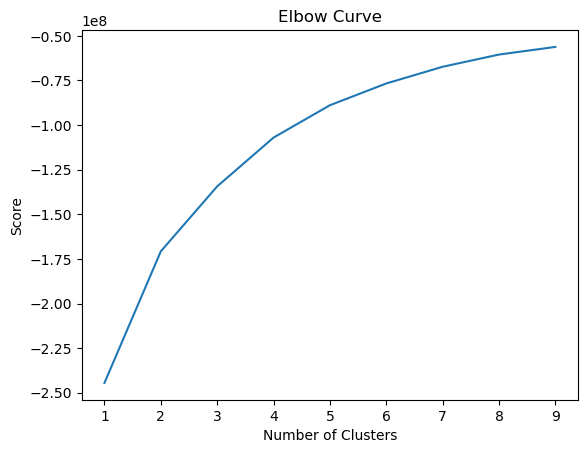

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### There is no clear break in the plot line, but my guess is that the elbow is around the value of 3.

In [37]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [38]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00221139]]
Mean squared error:  0.09039282071428499
R2 score:  0.014465895561980413


In [39]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,-0.006925
1,0.0,-0.002502
2,0.0,0.015189
3,0.0,0.092588
4,2.0,0.081531
5,0.0,-0.000291
6,0.0,0.019612
7,0.0,0.070474
8,0.0,-0.006925
9,0.0,0.006343


# 5. k-means Clustering

In [17]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fit the k-means object to the data.
kmeans.fit(df_num)

C:\Users\maryn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
df_num['clusters'] = kmeans.fit_predict(df_num)

C:\Users\maryn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
df_num.head()

,year,month,fra_district,train_speed,temperature,damage_cost,persons_killed,persons_injured,clusters
0,2017,6,4,10.0,65.0,0.0,0.0,0.0,0
1,2017,6,4,0.0,65.0,0.0,0.0,0.0,0
2,1981,4,1,0.0,28.0,0.0,0.0,0.0,1
3,2007,1,5,4.0,56.0,0.0,0.0,0.0,0
4,2017,10,4,0.0,66.0,0.0,0.0,1.0,0


In [23]:
df_num['clusters'].value_counts()

clusters
0    118365
1     92219
2        82
Name: count, dtype: int64

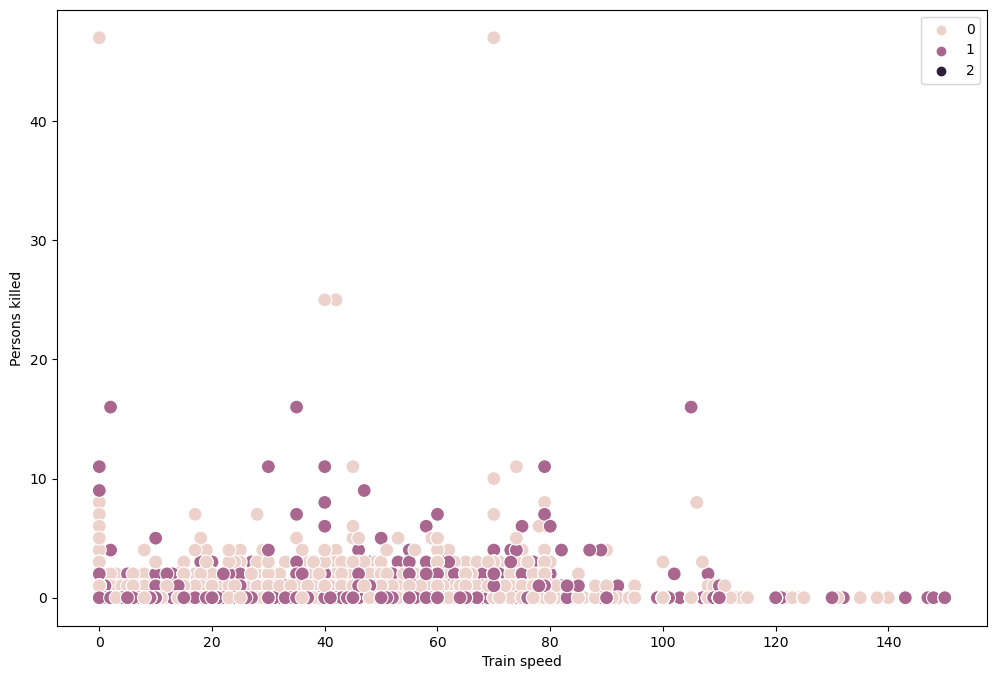

In [24]:
# Plot the clusters for the "persons_killed" and "train_speed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['train_speed'], y=df_num['persons_killed'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Train speed') # Label x-axis.
plt.ylabel('Persons killed') # Label y-axis.
plt.show()

### In this plot, it does not appear that there are very clear clusters that are well separated from each other.

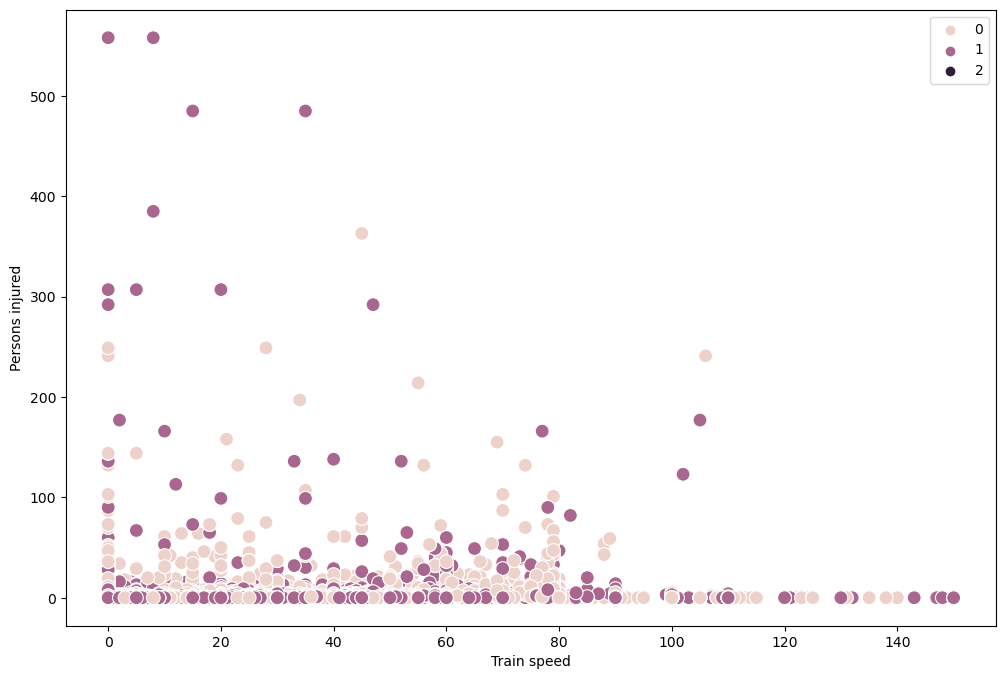

In [25]:
# Plot the clusters for the "persons_injured" and "train_speed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['train_speed'], y=df_num['persons_injured'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Train speed') # Label x-axis.
plt.ylabel('Persons injured') # Label y-axis.
plt.show()

### Similar to the previous plot, there are no clear, well-separated clusters.

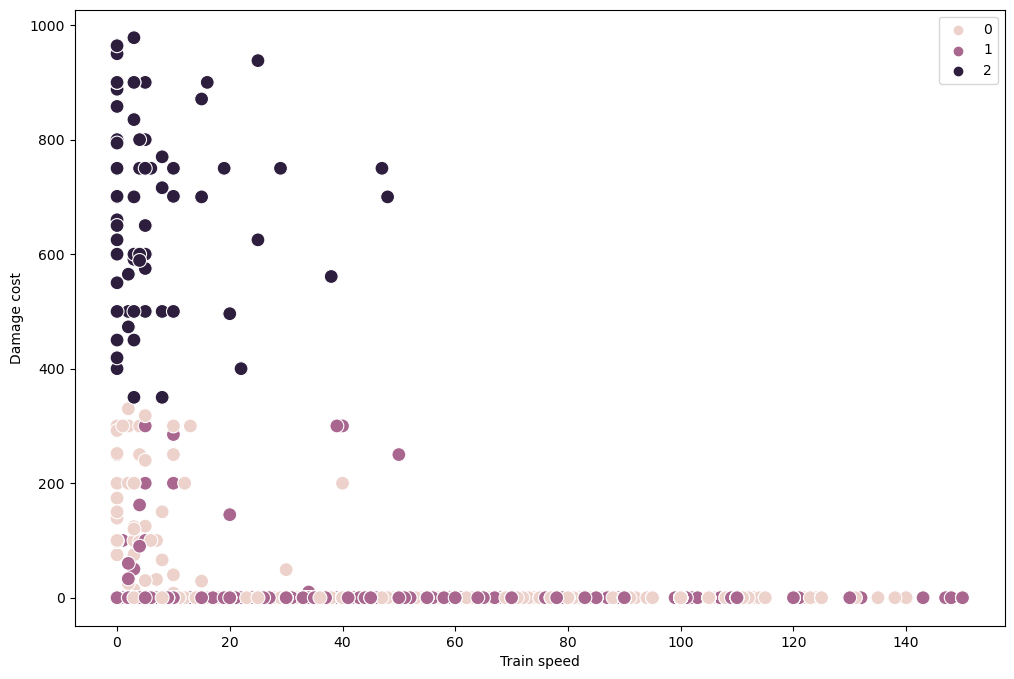

In [26]:
# Plot the clusters for the "train_speed" and "damage_cost" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['train_speed'], y=df_num['damage_cost'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Train speed') # Label x-axis.
plt.ylabel('Damage cost') # Label y-axis.
plt.show()

### Cluster 2 (dark purple) has a distinct pattern, with most of its points having a high damage cost and very low train speed. 
### The significant overlap between Clusters 0 and 1 suggests that the clustering algorithm may not be effectively separating these two clusters.

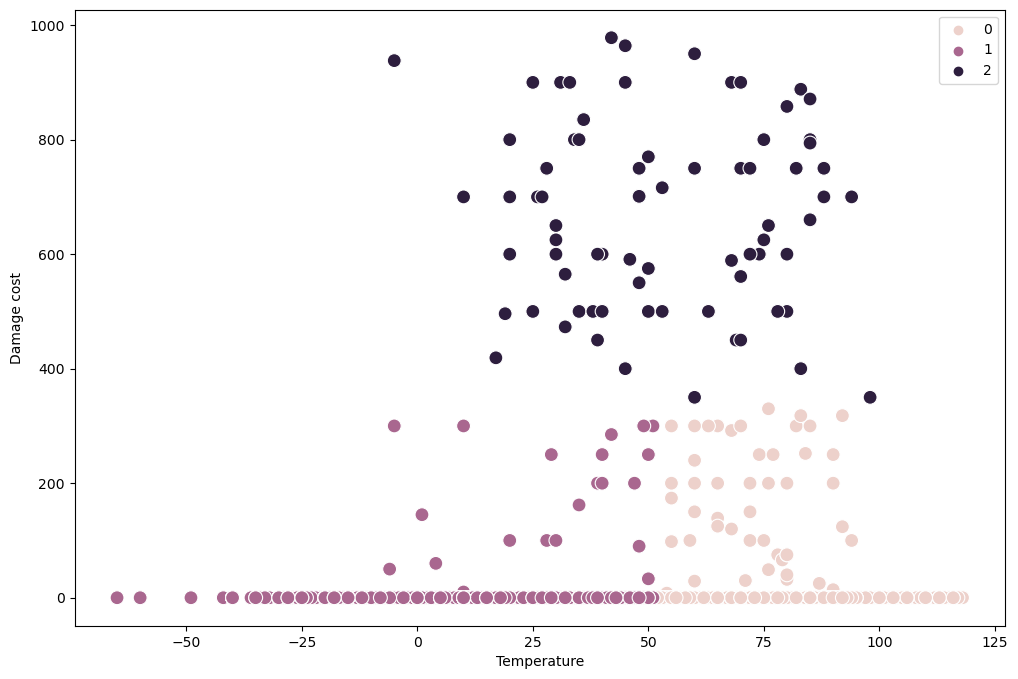

In [27]:
# Plot the clusters for the "temperature" and "damage_cost" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['temperature'], y=df_num['damage_cost'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Temperature') # Label x-axis.
plt.ylabel('Damage cost') # Label y-axis.
plt.show()

### The plot shows three distinct clusters based on temperature and damage cost. Cluster 2 (dark purple) is characterised by high damage costs, typically above 400, and spans a wide range of temperatures, indicating incidents with significant damage regardless of temperature. Clusters 0 (light pink) and 1 (purple) are both associated with lower damage costs, mostly below 200, but Cluster 0 primarily occupies higher temperature ranges (above 25), while Cluster 1 covers a broader temperature range including negative temperatures, suggesting different environmental conditions for lower cost incidents.

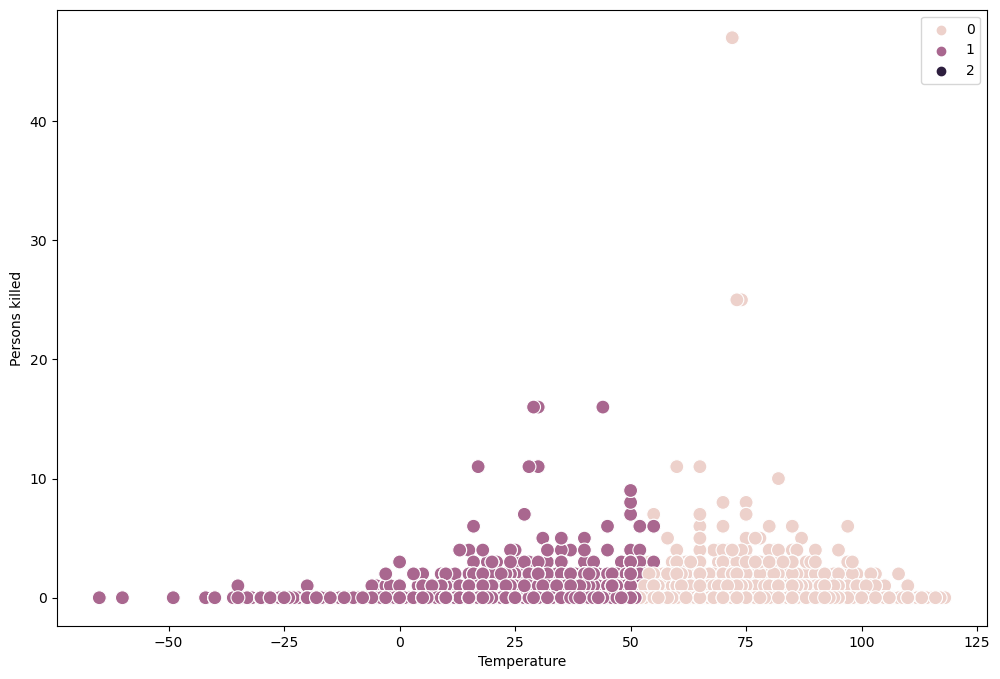

In [34]:
# Plot the clusters for the "temperature" and "persons_killed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['temperature'], y=df_num['persons_killed'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Temperature') # Label x-axis.
plt.ylabel('Persons killed') # Label y-axis.
plt.show()

### The plot shows two clear clusters based on temperature and the number of persons killed. Cluster 1 (purple) includes mainly incidents with up to about 10 persons killed and temperatures ranging from -50 F to 50 F, suggesting it captures incidents across a wide range of temperature conditions but with relatively lower fatalities number. Cluster 0 (light pink) includes incidents with similar or slightly fewer fatalities (although with few high outliers), but tends to occur at higher temperatures (above 50 F).

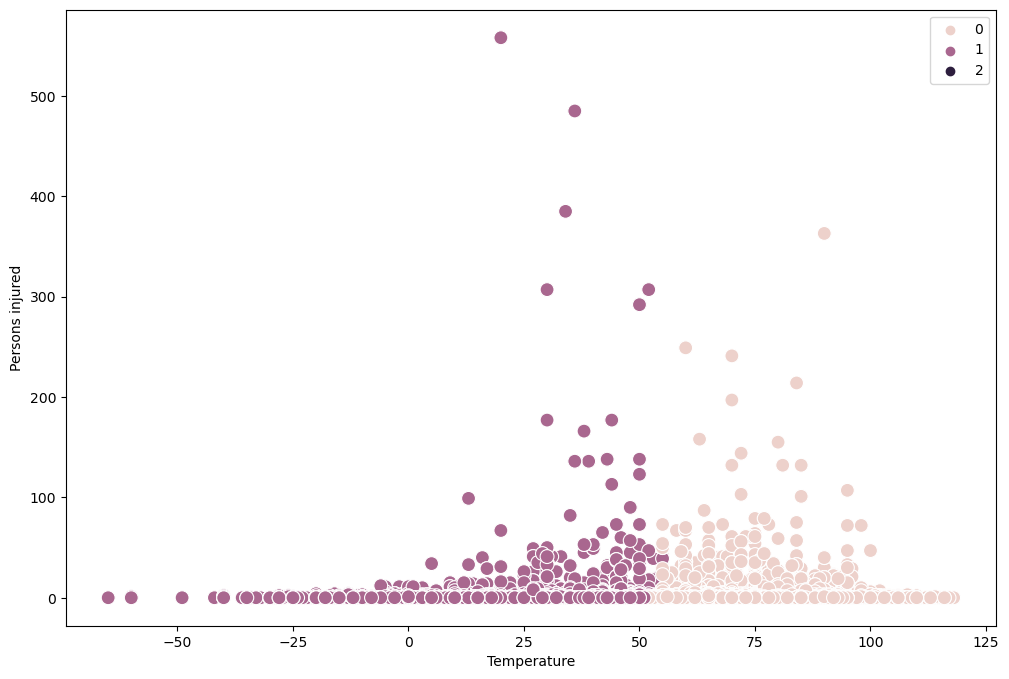

In [35]:
# Plot the clusters for the "temperature" and "persons_injured" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['temperature'], y=df_num['persons_injured'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Temperature') # Label x-axis.
plt.ylabel('Persons injured') # Label y-axis.
plt.show()

### Similar to the previous plot, there are two clearly visible clusters based on temperature and the number of persons injured. Cluster 1 (purple) is concentrated at lower temperatures (ranging from -50 to about 50) and has a higher density of incidents with up to around 100 persons injured, including several outliers with higher numbers of injuries. Cluster 0 (light pink) is concentrated at higher temperatures (above 50) and also features incidents with up to around 100 persons injured. This suggests a temperature-dependent pattern where different clusters dominate under different temperature ranges.

In [32]:
# Assigning color labels based on cluster numbers
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [33]:
# Perform the group-by aggregation for each cluster
df_num.groupby('cluster').agg({'train_speed':['mean', 'median'], 
                         'temperature':['mean', 'median'], 
                         'damage_cost':['mean', 'median'],
                         'persons_killed':['mean', 'median'],
                         'persons_injured':['mean', 'median']})

train_speed        temperature        damage_cost         \
                   mean median        mean median        mean median   
cluster                                                                
dark purple    6.390244    3.0   51.719512   48.0  666.804878  680.0   
pink          11.595387    5.0   72.435673   71.0    0.073468    0.0   
purple        12.001843    5.0   34.848187   38.0    0.044297    0.0   

            persons_killed        persons_injured         
                      mean median            mean median  
cluster                                                   
dark purple       0.024390    0.0        0.097561    0.0  
pink              0.022338    0.0        0.215554    0.0  
purple            0.016125    0.0        0.211486    0.0

### The descriptive statistics of the clusters tell us the following: 
### The dark purple cluster represents with low train speeds, moderate temperatures, high damage costs, low or zero number of fatalities, and similar number of injuries.
### The pink cluster represents moderate train speeds, higher temperatures, low or zero damage costs, low or zero number of fatalities, and also similar number of injuries.
### The purple cluster represents the highest train speeds, cooler temperatures, low or zero damage costs, low or zero number of fatalities, and relatively high number of injuries.